In [1]:
install.packages("MASS")
library("MASS")
install.packages("missMDA")
library("missMDA")
install.packages("tidyverse")
library("tidyverse")
install.packages("caret")
library("caret")

Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'MASS' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\Rtmp4iJ3ny\downloaded_packages


Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)




  There is a binary version available but the source version is later:
        binary source needs_compilation
missMDA   1.16   1.17             FALSE



installing the source package 'missMDA'


Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\Rtmp4iJ3ny\downloaded_packages


-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.4
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
x dplyr::select() masks MASS::select()

Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'caret' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\Rtmp4iJ3ny\downloaded_packages


Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift




In [2]:
ionomics <- read.csv('geneva_x_raw_spec_as_int.csv',colClasses =c("NULL","NULL",NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,
                                                                    NA,NA,NA,NA,NA,NA,NA))
ionomics <- imputePCA(ionomics, method = "Regularized")

In [3]:
# Split the data into training (80%) and test set (20%)
set.seed(123)
training.samples <- ionomics$completeObs[,2] %>%
  createDataPartition(p = 0.8, list = FALSE)
train.data <- ionomics$completeObs[training.samples, ]
test.data <- ionomics$completeObs[-training.samples, ]
train.data <- unlist(test.data)
test.data <- unlist(test.data)
train.data <- as.data.frame(train.data)
test.data <- as.data.frame(test.data)

In [4]:
# Fit the model
model <- lda(spec_as_int~., data = train.data)
# Make predictions
predictions <- model %>% predict(test.data)
# Model accuracy
mean(predictions$class==test.data$spec_as_int)
model

[1] 1

Call:
lda(spec_as_int ~ ., data = train.data)

Prior probabilities of groups:
               1                2                3                4 
           0.125            0.025            0.075            0.175 
               5 5.07696182993507 5.16461243592947                6 
           0.025            0.025            0.025            0.375 
               7                8 
           0.075            0.075 

Group means:
                       B11     Na23     Mg26     Al27      P31      S34
1                 66.55059 123.3023 1547.899 29.52612 5967.685 2123.559
2                 46.67490 118.4319 1548.720 18.62911 5241.988 2480.767
3                130.69957 351.2537 1589.180 25.99511 6611.228 2560.071
4                 91.38694 236.0704 1625.825 18.76883 5421.638 2223.124
5                205.92464 295.5591 2348.847 22.68523 6333.000 1515.482
5.07696182993507  24.99672 184.9826 1645.628 19.37257 5091.023 2680.601
5.16461243592947  67.74117 304.3141 1569.375 16.67715 6748

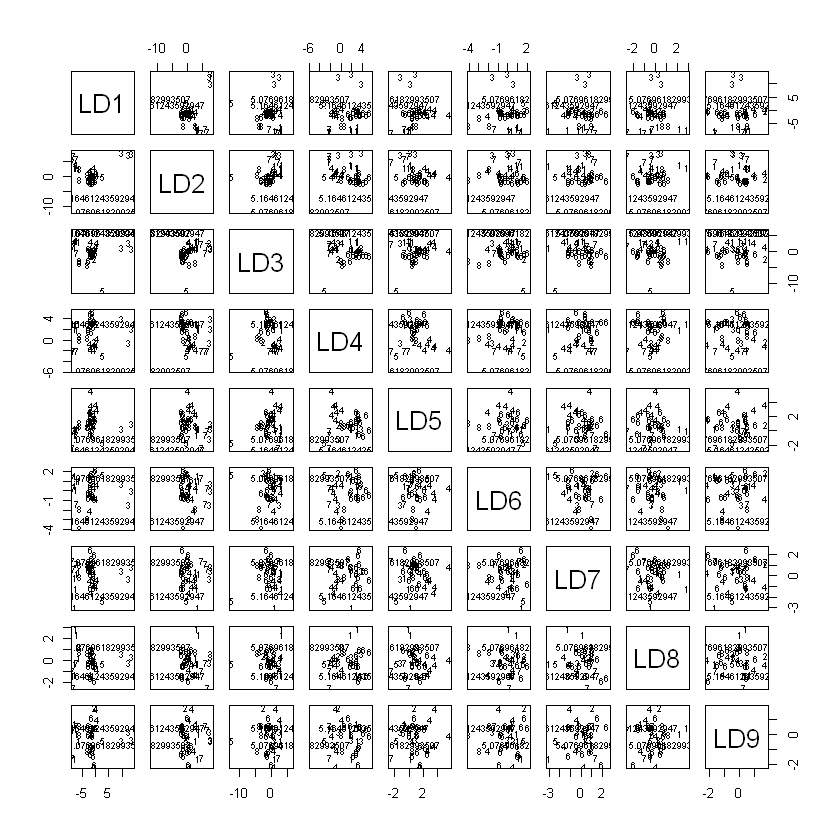

In [5]:
plot(model)

In [6]:
# Predicted classes
head(predictions$class, 6)
# Predicted probabilities of class memebership.
head(predictions$posterior, 6) 
# Linear discriminants
head(predictions$x, 3) 

[1] 1 1 1 1 1 2
Levels: 1 2 3 4 5 5.07696182993507 5.16461243592947 6 7 8

,1,2,3,4,5,5.07696182993507,5.16461243592947,6,7,8
1,1.000000e+00,6.138554e-25,3.694637e-92,8.021485e-16,8.851759e-73,3.464439e-104,1.622863e-58,1.748273e-15,2.278692e-08,3.804666e-15
2,9.999999e-01,3.048185e-26,1.648183e-94,3.086696e-18,9.225085e-89,1.115800e-100,1.002628e-51,4.548065e-16,7.158635e-08,1.571116e-17
3,1.000000e+00,3.412688e-21,3.501567e-82,2.555954e-13,3.911285e-83,5.464534e-91,3.563199e-48,3.461097e-11,1.128946e-10,1.024982e-15
4,1.000000e+00,7.672430e-25,2.984077e-87,4.554282e-16,2.370361e-88,3.977184e-97,1.222879e-57,2.468178e-17,1.053179e-08,1.597770e-17
5,1.000000e+00,1.218573e-26,3.761661e-90,7.539301e-18,4.113478e-90,1.406876e-97,8.651595e-52,8.177891e-17,3.042464e-13,1.824576e-17
6,2.254774e-23,9.999203e-01,3.118563e-56,1.705436e-07,1.595416e-31,9.812387e-56,2.181079e-40,7.954802e-05,1.791281e-28,1.801498e-11


,LD1,LD2,LD3,LD4,LD5,LD6,LD7,LD8,LD9
1,-6.325700,2.705268,0.9274617,0.8574509,-0.6267760,1.5114350,-3.1438052,-0.2497484,-1.4942216
2,-6.599384,2.218501,2.7671075,1.6714090,-1.4511686,0.4620359,-0.2834243,-1.1855307,0.8949924
3,-5.027681,1.886972,2.6963582,1.9154319,-0.3062365,1.0146847,0.2843435,0.3571946,-0.2624680


In [7]:
table <- table(Predicted=predictions$class, Species=test.data$spec_as_int)
print(confusionMatrix(table))

Confusion Matrix and Statistics

                  Species
Predicted           1  2  3  4  5 5.07696182993507 5.16461243592947  6  7  8
  1                 5  0  0  0  0                0                0  0  0  0
  2                 0  1  0  0  0                0                0  0  0  0
  3                 0  0  3  0  0                0                0  0  0  0
  4                 0  0  0  7  0                0                0  0  0  0
  5                 0  0  0  0  1                0                0  0  0  0
  5.07696182993507  0  0  0  0  0                1                0  0  0  0
  5.16461243592947  0  0  0  0  0                0                1  0  0  0
  6                 0  0  0  0  0                0                0 15  0  0
  7                 0  0  0  0  0                0                0  0  3  0
  8                 0  0  0  0  0                0                0  0  0  3

Overall Statistics
                                     
               Accuracy : 1         